# TP4

## Importation de paquets et de modules Python

In [1]:
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import textcleaner as tc
from stop_words import get_stop_words
from nltk.probability import FreqDist
import langid
import pycountry
from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Création d'un corpus

### Récupération de nos documents à partir du dossier txt

In [2]:
root = "../data/leopoldII/txt/"
leopoldII = "../data/leopoldII/"
temp_path = '../data/leopoldII/tmp/'

txts = os.listdir(root)
files = sorted(txts)
print(f"Nous avons récupéré {len(files)} fichiers de la bibliothèque numérique CAMille.")

Nous avons récupéré 1000 fichiers de la bibliothèque numérique CAMille.


#### Nous vérifions si nos documents sont francophones

In [3]:
langid.set_languages(['fr', 'nl'])

limit = None

lang_dict = defaultdict(int)
txts = txts[:limit] if limit else txts

for i, txt in enumerate(files):
    if txt.endswith("txt"):
        if i % 50 == 0:
            print(f'{i} document(s) processed...')
        text = open(os.path.join(root, txt)).read()
        text_length = len(text)
        if text_length > 20:
            lang, conf = langid.classify(text)
            lang_dict[lang] += 1
        else:
            print(f"{txt} contains only {text_length} characters, treating as unknown")
            lang_dict['n/a'] += 1
print("Done")

for lang_code, nb_docs in lang_dict.items():
    language = pycountry.languages.get(alpha_2=lang_code)
    try:
        lang_name = language.name
    except AttributeError:
        lang_name = language
    print(f"{lang_name}\t{nb_docs}")

0 document(s) processed...
50 document(s) processed...
100 document(s) processed...
150 document(s) processed...
200 document(s) processed...
250 document(s) processed...
300 document(s) processed...
350 document(s) processed...
400 document(s) processed...
450 document(s) processed...
500 document(s) processed...
550 document(s) processed...
600 document(s) processed...
650 document(s) processed...
700 document(s) processed...
750 document(s) processed...
800 document(s) processed...
850 document(s) processed...
900 document(s) processed...
950 document(s) processed...
Done
French	1000


### Quelques statistiques

In [4]:
all_years = [str(year) for year in range(1885, 1908)]

count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
        elems = f.split("_")
        newspaper = elems[1]
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        month = int(elems[2].split("-")[1])
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1

In [5]:
print("Voici le nombre de documents que l'on a récupéré par journal :")
print(f"- {count_newspapers['JB729']} exemplaires de Le Vingtième Siècle")
print(f"- {count_newspapers['JB555']} exemplaires de L'Indépendance belge")
print(f"- {count_newspapers['JB427']} exemplaires de La Libre Belgique")
print(f"- {count_newspapers['JB427']} exemplaires de La Libre Belgique")
print(f"- {count_newspapers['JB421']} exemplaires de L'Avenir du Luxembourg")
print(f"- {count_newspapers['JB773']} exemplaires de Vers l'Avenir")
print(f"- {count_newspapers['JB685']} exemplaires de Le Petit Bleu")
print(f"- {count_newspapers['JB567']} exemplaires de Journal de Bruxelles")
print(f"- {count_newspapers['JB838']} exemplaires du journal Le Soir")
print(f"- {count_newspapers['JB555A']} exemplaires de L'Indépendance belge (édité en Angleterre)")
print(f"- {count_newspapers['JB638']} exemplaires de La Meuse")
print(f"- {count_newspapers['JB837']} exemplaires de Le Peuple")
print(f"- {count_newspapers['JB1051']} exemplaires de Le Drapeau rouge")
print(f"- {count_newspapers['JB572']} exemplaires de Journal de Charleroi")

Voici le nombre de documents que l'on a récupéré par journal :
- 239 exemplaires de Le Vingtième Siècle
- 264 exemplaires de L'Indépendance belge
- 0 exemplaires de La Libre Belgique
- 0 exemplaires de La Libre Belgique
- 6 exemplaires de L'Avenir du Luxembourg
- 0 exemplaires de Vers l'Avenir
- 130 exemplaires de Le Petit Bleu
- 133 exemplaires de Journal de Bruxelles
- 93 exemplaires du journal Le Soir
- 0 exemplaires de L'Indépendance belge (édité en Angleterre)
- 79 exemplaires de La Meuse
- 21 exemplaires de Le Peuple
- 0 exemplaires de Le Drapeau rouge
- 35 exemplaires de Journal de Charleroi


In [6]:
missing_years = [y for y in all_years if y not in covered_years]

print(f"Les années manquantes de notre corpus sont: {', '.join(missing_years)}")

Les années manquantes de notre corpus sont: 1886, 1888


12


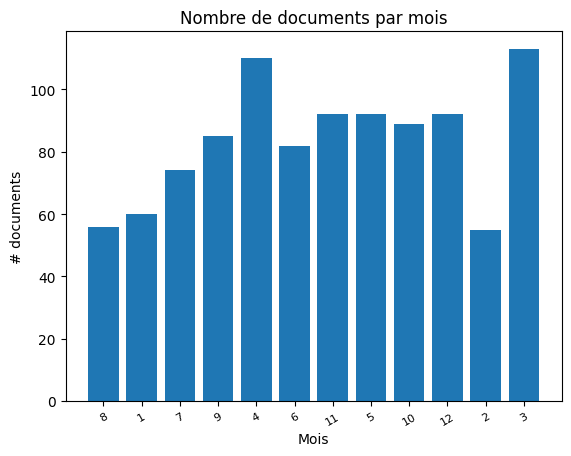

In [7]:
index = np.arange(len(count_month))
print(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

### Création d'un grand fichier corpus.txt comprenant tous les documents

In [8]:
!cat ../data/leopoldII/txt/*.txt > ../data/leopoldII/corpus.txt
!wc ../data/leopoldII/corpus.txt

print("On obtient ici, dans l'ordre, le nombre de lignes, de mots, et d'octets compris dans notre corpus.")


       0  6191901 37600726 ../data/leopoldII/corpus.txt
On obtient ici, dans l'ordre, le nombre de lignes, de mots, et d'octets compris dans notre corpus.


### Récupération de notre fichier corpus.txt

In [9]:
corpus = "../data/leopoldII/corpus.txt"
with open(corpus) as f:
    text = f.read()
    
print(text[:600])

Il 1 - . - ■ ■ ■ r ' I ' "'" * I i théâtre ou à proximité. Sûrement, il eût été compromis un des premiers, car il était ardent mazziniste. Et dire que, s'il avait possédé un simple rat de cave, toute sa destinée était changée, et peut-être aussi celle de l'Italie I Chronique locale. — — ARLON. — Exposition des églises pauvres. — C'est demain que s'ouvrira, rue St-Jean, l'exposition des objets confectionnés par les dames de l'Association des églises pauvres : elle sera également accessible au public le lundi 5. Les deux jours l'exposition sera ouverte de 2 à 6 h. du soir. Nous convions nos conc


### Création d'une une liste de stopwords

In [10]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

print(f"Il existe {len(sw)} stopwords dans notre liste :\n {sorted(sw)}")

Il existe 197 stopwords dans notre liste :
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mo

### Tokenization

In [11]:
words = nltk.wordpunct_tokenize(text)

print(f"Nous avons identifié {len(words)} tokens dans notre corpus.")
print(f"Voici un apperçu des 25 premiers tokens :\n {words[:25]}")

Nous avons identifié 9006676 tokens dans notre corpus.
Voici un apperçu des 25 premiers tokens :
 ['Il', '1', '-', '.', '-', '■', '■', '■', 'r', "'", 'I', "'", '"\'"', '*', 'I', 'i', 'théâtre', 'ou', 'à', 'proximité', '.', 'Sûrement', ',', 'il', 'eût']


### Éliminer les stopwords et les termes non alphabétiques

In [12]:
kept = [w.lower() for w in words if len(w) > 2 and len(w) < 25 and w.isalpha()]


print(f"{len(kept)} tokens ont été conservés après le nettoyage des stopwords et des termes non alphabétiques.")
print(f"Voici un apperçu des 25 premiers tokens conservés :\n {kept[:25]}")

3596837 tokens ont été conservés après le nettoyage des stopwords et des termes non alphabétiques.
Voici un apperçu des 25 premiers tokens conservés :
 ['théâtre', 'proximité', 'sûrement', 'eût', 'été', 'compromis', 'des', 'premiers', 'car', 'était', 'ardent', 'mazziniste', 'dire', 'que', 'avait', 'possédé', 'simple', 'rat', 'cave', 'toute', 'destinée', 'était', 'changée', 'peut', 'être']


#### Vérification

In [13]:
# kept = [k.lower() for k in words if k not in sw]
if any("ai" in k for k in kept):
    print("le mot 'ai' est dans la liste")
else:
    print("le mot 'ai' n'est pas là dans la liste")

le mot 'ai' est dans la liste


In [14]:
dataset = ['coucou','ce','ai','a','des']
A = [word for word in dataset if word not in sw]

if any("ai" in k for k in A):
    print("le mot 'ai' est dans la liste")
else:
    print("le mot 'ai' n'est pas là dans la liste")


le mot 'ai' n'est pas là dans la liste


In [15]:
n = 30
voc = set(kept)
sorted(voc, key=len, reverse=True)[:n]

['lsdlstriesmttallcrgiques',
 'imperméablesderntlahaule',
 'kesaaleaijemappalaalléta',
 'nedcrlandschcfabrickvati',
 'eessaiesajemeppelesliége',
 'briquettesdehouiuzdsnord',
 'dechamaiilardaflirmcquel',
 'bëbhtuêêsmmëêwêêawêbmbêl',
 'proclamentsleïmeilléurfi',
 'administratetuvdirecteur',
 'kesaaieaijemeppelelllite',
 'monsieurquiroccompagnait',
 'permetdedéterminerlecour',
 'sxizanfierréfléchissaiil',
 'probablementriédoulables',
 'overysschepargroeuendael',
 'sculremèdespécialceilain',
 'religieusesfranciscainas',
 'prostemeravecamourdevant',
 'tdleriesdeconstantinowka',
 'télerlesdeconstantinotka',
 'lesremboursementspendant',
 'enseiguémentgéqgrapbique',
 'eutstdssvillssttringirca',
 'ssstatsssriiksrlfsjrgjlc',
 'jmeusepersoonsohtientles',
 'iewnaffranchieàucentimes',
 'oiinecommounomarionnotte',
 'reuiculeaxpetnangealsons',
 'lndcstrixtrétallcrgiqocs']

In [16]:
kept_string = " ".join(kept)
with open('../data/leopoldII/corpus_clean.txt', 'w') as f:
    f.write(kept_string)
    

with open('../data/leopoldII/corpus_clean.txt', 'r') as i:
    after = i.read()
after[:500]

'théâtre proximité sûrement eût été compromis des premiers car était ardent mazziniste dire que avait possédé simple rat cave toute destinée était changée peut être aussi celle italie chronique locale arlon exposition des églises pauvres est demain que ouvrira rue jean exposition des objets confectionnés par les dames association des églises pauvres elle sera également accessible public lundi les deux jours exposition sera ouverte soir nous convions nos concitoyens aller visiter cette exposition '

In [17]:
frequencies = Counter(after.split())
print(frequencies.most_common(50))

[('les', 67716), ('des', 51004), ('est', 33281), ('que', 30885), ('une', 28115), ('pour', 25627), ('qui', 25329), ('par', 24808), ('dans', 22524), ('pas', 16121), ('sur', 14963), ('plus', 13143), ('aux', 11957), ('nous', 11296), ('sont', 11009), ('bruxelles', 10747), ('rue', 10230), ('son', 9935), ('ont', 9746), ('avec', 9710), ('été', 9566), ('congo', 8763), ('elle', 8654), ('cap', 7992), ('mais', 7851), ('cette', 7825), ('vous', 7743), ('ord', 7167), ('emp', 6866), ('tout', 6784), ('fer', 6753), ('ses', 6279), ('priv', 6276), ('tous', 6268), ('nord', 6167), ('anvers', 6161), ('lui', 6111), ('prix', 5944), ('div', 5889), ('paris', 5760), ('bien', 5685), ('fait', 5664), ('être', 5620), ('belgique', 5571), ('était', 5436), ('belge', 5432), ('sans', 5408), ('ces', 5397), ('grand', 5394), ('comme', 5288)]


In [19]:
fdist = nltk.FreqDist(after)
fdist.most_common(10)

[(' ', 3596836),
 ('e', 2690758),
 ('r', 1737908),
 ('i', 1723974),
 ('s', 1717950),
 ('a', 1652026),
 ('n', 1529146),
 ('t', 1466855),
 ('o', 1353560),
 ('u', 1147124)]

In [18]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

NameError: name 'fdist' is not defined